# Final Project Eddy Zeng
I did end up switching the dataset, the new dataset is also from kaggle, more details below

## Dataset Description (10 points)
Tell us about your dataset, including: 
    - Where you got it
    - Why the source is reliable
    - How it was gathered (study info, participants, etc.)
    - What each column contains and any applicable measurment units

In [0]:
# dataset url: https://www.kaggle.com/chrisbow/2018-calorie-exercise-and-weight-changes

In [0]:
# when it comes reliability, this is a self tracked dataset of a person's weight change and no official data was used
# this is a self study involving one participant
# data on the participant's weight, caloric intake, etc

In [0]:
# columns information Columns
# Date date of observations
# Stone Stone, pounds, ounces: observed weight
# Pounds Stone, pounds, ounces: observed weight
# Ounces Stone, pounds, ounces: observed weight
# weight_oz Total weight in ounces
# calorie sapproximate calories consumed on that date. Calorie counts were taken for each food based on nutritional information and rounded up to the nearest 50 to facilitate easy record keeping. Where nutritional information was not available, calorie counts were estimated from previous experience and best guesses of ingredients and comparison to meals with available nutritional information.
# cals_per_oz calories per ounce - calories for that day divided by weight in ounces
# five_donuts day where main meal was bag of five jam donuts, 1 = TRUE, 0 = FALSE
# walk day included at least one brisk walk of over 20 minutes, 1 = TRUE, 0 = FALSE
# run day included at one short run of 2.5 miles, 1 = TRUE, 0 = FALSE
# wine day finished with at least one large glass of wine when not accompanied by other fluids, 1 = TRUE, 0 = FALSE
# prot day involved what would be considered a high protein diet, 1 = TRUE, 0 = FALSE
# weight signifies day during period of weight-based exercise; includes rest days as part of period, 1 = TRUE, 0 = FALSE
# change change: resulting change in weight in oz, calculated from following day's observed weigh#

## Read in and Clean Dataset (10 points)
Read in your dataset and do all of the necessary transformations and munging including: 
    - Parsing column headers
    - Finding and handling null values
    - Encoding categorical variables
    - Dropping unnecessary columns
    - Binning any large range categorical variables

In [0]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
from sklearn import datasets, linear_model

In [0]:
diet = pd.read_csv('/Users/zengy/Documents/GitHub/502week3/python_data_analysis/Homework/diet_data.csv', 
                 header=0)
diet.head()

,Date,Stone,Pounds,Ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,7/30/2018,12.0,2.0,6.0,2726.0,1950.0,0.72,1.0,1.0,0.0,0.0,0.0,0.0,-30.0
1,7/31/2018,12.0,0.0,8.0,2696.0,2600.0,0.96,1.0,0.0,0.0,0.0,0.0,0.0,8.0
2,8/1/2018,12.0,1.0,0.0,2704.0,2500.0,0.92,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,8/2/2018,12.0,1.0,0.0,2704.0,1850.0,0.68,1.0,1.0,0.0,1.0,0.0,0.0,-40.0
4,8/3/2018,11.0,12.0,8.0,2664.0,2900.0,1.09,1.0,1.0,0.0,0.0,0.0,0.0,14.0


In [0]:
diet.describe()

,Stone,Pounds,Ounces,weight_oz,calories,five_donuts,walk,run,wine,prot,weight,change
count,142.000000,142.000000,142.000000,149.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,147.000000
mean,11.535211,6.218310,3.577465,2560.724832,3180.714286,0.371429,0.678571,0.250000,0.307143,0.178571,0.442857,-19.088435
std,0.500524,5.655746,2.915656,571.190848,1478.753433,0.484922,0.468702,0.434568,0.462966,0.384368,0.498508,215.557796
min,11.000000,0.000000,0.000000,0.000000,1400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2598.000000
25%,11.000000,1.000000,0.000000,2662.000000,2187.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-18.000000
50%,12.000000,3.500000,4.000000,2688.000000,2575.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-2.000000
75%,12.000000,12.000000,6.000000,2704.000000,3850.000000,1.000000,1.000000,0.250000,1.000000,0.000000,1.000000,14.000000
max,12.000000,13.000000,8.000000,2768.000000,9150.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.000000


In [0]:
diet.dtypes

Date            object
Stone          float64
Pounds         float64
Ounces         float64
weight_oz      float64
calories       float64
cals_per_oz     object
five_donuts    float64
walk           float64
run            float64
wine           float64
prot           float64
weight         float64
change         float64
dtype: object

In [0]:
diet.isnull().sum()

Date            1
Stone           9
Pounds          9
Ounces          9
weight_oz       2
calories       11
cals_per_oz     4
five_donuts    11
walk           11
run            11
wine           11
prot           11
weight         11
change          4
dtype: int64

In [0]:
# right off the back I'm going to get rid of stone, pounds and Ounces and keep weight_oz
# since the other three are just weight in different units
# no clean up needed for those three columns

In [0]:
diet[['weight_oz', 'calories', 'change']].mean()

weight_oz    2560.724832
calories     3180.714286
change        -19.088435
dtype: float64

In [0]:
# donuts, walk, run, prot, wine, weight are all binary columns, though the types are float
# null values in these columns likely means the day wasn't being recorded so its best to drop the rows

In [0]:
diet = diet.dropna()
diet.isnull().sum()
# all rows with null values dropped

Date           0
Stone          0
Pounds         0
Ounces         0
weight_oz      0
calories       0
cals_per_oz    0
five_donuts    0
walk           0
run            0
wine           0
prot           0
weight         0
change         0
dtype: int64

In [0]:
diet.count()

Date           140
Stone          140
Pounds         140
Ounces         140
weight_oz      140
calories       140
cals_per_oz    140
five_donuts    140
walk           140
run            140
wine           140
prot           140
weight         140
change         140
dtype: int64

In [0]:
# donuts, walk, run, prot, wine, weight are binary columns and can be one hot encoded
# but because they are all already in formats of 1 and 0, if I change the type from float to int will be the same thing

In [0]:
diet['five_donuts'] = diet['five_donuts'].astype(int)
diet['walk'] = diet['walk'].astype(int)
diet['run'] = diet['run'].astype(int)
diet['wine'] = diet['wine'].astype(int)
diet['prot'] = diet['prot'].astype(int)
diet['weight'] = diet['weight'].astype(int)

In [0]:
# dropping columns stone, pounds, ounces
diet = diet.drop(['Stone', 'Pounds', 'Ounces'], axis = 1)
diet.columns

Index(['Date', 'weight_oz', 'calories', 'cals_per_oz', 'five_donuts', 'walk',
       'run', 'wine', 'prot', 'weight', 'change'],
      dtype='object')

In [0]:
# no binning necessary theres no need to put value into categories

## Exploratory Data Analysis (20 points)
Once you've cleaned your dataset, now you can examine your dataset using the steps we outlined in the EDA section of class, including: 
- Examing the distribution of features
- Feature normalization and scaling
- Examining and plotting correlation between variables
- Detecting and Handling outliers

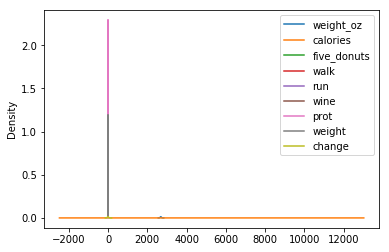

In [0]:
diet.plot(kind = 'density')

In [0]:
# scaling weight_oz, calories, and change
from sklearn import preprocessing 
dietscale = diet[['weight_oz', 'calories', 'change']]

In [0]:
# minmax is not a good way for this set because value goes to negative sometimes
standard = preprocessing.StandardScaler()
dietscale = pd.DataFrame(standard.fit_transform(dietscale), columns=dietscale.columns)
dietscale.describe()

,weight_oz,calories,change
count,1.400000e+02,1.400000e+02,1.400000e+02
mean,6.429777e-15,-3.489272e-17,5.075305e-17
std,1.003591e+00,1.003591e+00,1.003591e+00
min,-2.090289e+00,-1.208523e+00,-2.259758e+00
25%,-6.197341e-01,-6.740682e-01,-6.603339e-01
50%,4.551719e-02,-4.110822e-01,-6.054964e-02
75%,5.707156e-01,4.542264e-01,6.991770e-01
max,2.811562e+00,4.051196e+00,4.137940e+00


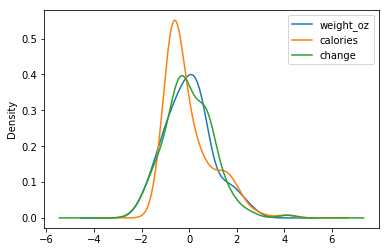

In [0]:
dietscale.plot(kind = 'density')

In [0]:
dietscale.corr()

,weight_oz,calories,change
weight_oz,1.000000,-0.090605,-0.425912
calories,-0.090605,1.000000,0.773989
change,-0.425912,0.773989,1.000000


In [0]:
diet['change'] = dietscale['change']
diet['weight_oz'] = dietscale['weight_oz']
diet['calories'] = dietscale['calories']
diet.corr()

,weight_oz,calories,five_donuts,walk,run,wine,prot,weight,change
weight_oz,1.000000,-0.137612,-0.061664,-0.011940,-0.095055,0.051153,-0.030135,0.058272,-0.454352
calories,-0.137612,1.000000,0.015376,-0.104228,0.192079,-0.038908,0.047781,0.191789,0.774805
five_donuts,-0.061664,0.015376,1.000000,0.275835,-0.136558,-0.159311,-0.281215,-0.149653,0.039156
walk,-0.011940,-0.104228,0.275835,1.000000,-0.132453,-0.072229,0.201095,0.059382,-0.097861
run,-0.095055,0.192079,-0.136558,-0.132453,1.000000,-0.062577,-0.053838,0.249068,0.065623
wine,0.051153,-0.038908,-0.159311,-0.072229,-0.062577,1.000000,-0.027434,-0.063680,-0.010755
prot,-0.030135,0.047781,-0.281215,0.201095,-0.053838,-0.027434,1.000000,0.522965,-0.004011
weight,0.058272,0.191789,-0.149653,0.059382,0.249068,-0.063680,0.522965,1.000000,0.060886
change,-0.454352,0.774805,0.039156,-0.097861,0.065623,-0.010755,-0.004011,0.060886,1.000000


## Linear Regression (or supplement with another appropriate model) (20 points)
Once your data is in a roughly normal distribution, you can now setup your model for linear regression. The questions you ask in this section should have been guided by the results of your EDA. 
- Create your model
- Visualize results
- Examine error
- Check and plot residuals

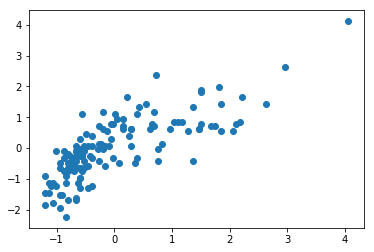

In [0]:
# the highest correlation in this dataset are between weight change and calories intake
plt.scatter(diet['calories'], diet['change'])

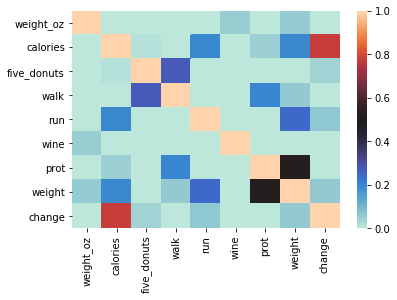

In [0]:
import seaborn as sns
corr = diet.corr()
sns.heatmap(corr, 
            vmin=0, vmax=1, # setting min and max probability
            center=0.5, # changing to peach for high correlation, blue for low
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


In [0]:
# running training and testing on calories and change
dietx = pd.DataFrame(diet.calories,
                 columns=["calories"])
diety = pd.DataFrame(diet.change,
                 columns=["change"])

In [0]:
dietx = dietx.dropna()
diety = diety.dropna()

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dietx, diety,  
                        test_size= 0.2,
                        random_state=20)

In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True,
                        n_jobs=6)

In [0]:
fit = model.fit(x_train, y_train)

In [0]:
coef_df = pd.DataFrame([dietx.columns[0], float(fit.coef_)]).T
coef_df.columns = ["feature", "coeff"]
coef_df

,feature,coeff
0,calories,0.819102


In [0]:
preds = model.predict(x_test)

Text(0, 0.5, 'Predictions')

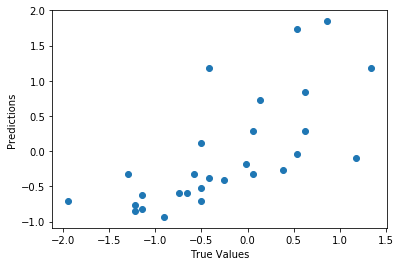

In [0]:
plt.scatter(y_test, preds)
plt.xlabel("True Values")
plt.ylabel("Predictions")

Text(0, 0.5, 'Residuals')

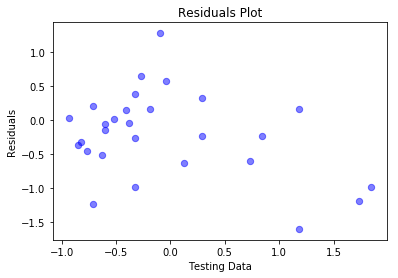

In [0]:
residuals = y_test - preds
plt.scatter(model.predict(x_test), residuals,
            c='b', s=40, alpha=0.5) # plot x_test vs residuals
plt.title("Residuals Plot")
plt.xlabel("Testing Data")
plt.ylabel("Residuals")

## Conclusion (40 points)
In this final section, you should draw conclusions based on your analysis. Each of your conclusion should be supported with visualizations and pvalues and any other appropriate measurments for your dataset. 

In [0]:
# Looking at the table, the number one factor that affects weight change is your daily calories intake
# with the highest correlation at 0.773989
dietscale.corr()

,weight_oz,calories,change
weight_oz,1.000000,-0.090605,-0.425912
calories,-0.090605,1.000000,0.773989
change,-0.425912,0.773989,1.000000


In [0]:
from scipy.stats import shapiro

# run shapiro test and return the test stat and p value
W_stat, p = shapiro(diety)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

# it's not normally distributed but that doesn't really matter

W-statistic= 0.9754273891448975, Pvalue= 0.014065527357161045
Sample does not look Gaussian (reject H0)


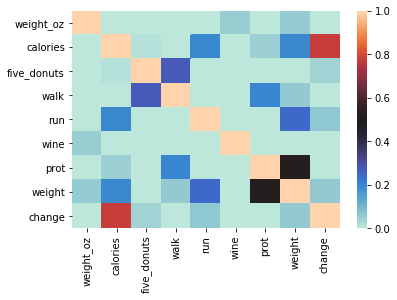

In [0]:
# everything else such as lifting weight, drinking, eating donuts and stuff like that play mininal role
# there can certain be effects but no enough to be casusal
import seaborn as sns
corr = diet.corr()
sns.heatmap(corr, 
            vmin=0, vmax=1, # setting min and max probability
            center=0.5, # changing to peach for high correlation, blue for low
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [0]:
# Second part of the conclusion has to do with the predicatbility of this participant's behavior
# looking at the second highest pair of correlation, we have weight and prot
diet[['weight','prot']].corr()
# this most likely incidicate they when the participant performed weight excersise during the day
# the participant also had a high protein diet
# however this combination doesn't necessary affect weight change

,weight,prot
weight,1.000000,0.522965
prot,0.522965,1.000000
